In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
m = 100
k = 4
domain = np.linspace(-1, 2, 1000)

In [4]:
def f(x):
    return -2*x**4 + 4*x**3 - x - 2
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [5]:
eps = sts.norm.rvs(loc=0, scale=1/10, size=m)
X = np.array([k/m for k in range(0, m)])
y_train = f(X) + eps

a0_est = -2.007077879182948
ai_est = [-1.3550857   1.22747512  3.09311822 -2.02971677]
R^2: 0.9317703625691308
MSE: 0.008602414672991662


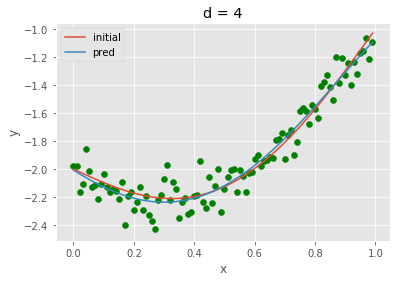

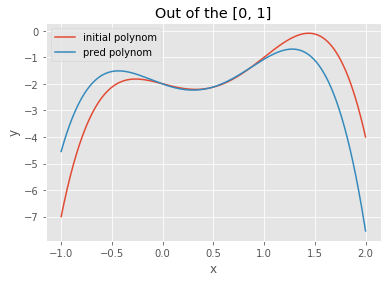

x = 1.2 prediction: -0.7295289648729235
x = 1.5 prediction: -1.1140545852246513
x = 2 prediction: -7.537871425393265


a0_est = -1.9703284374593262
ai_est = [ -2.55277931   9.86666327 -20.35006303  24.67565615 -10.79004967]
R^2: 0.9330850274521018
MSE: 0.008436661300920821


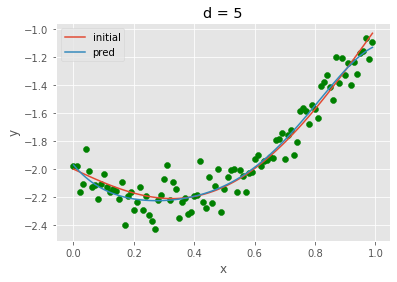

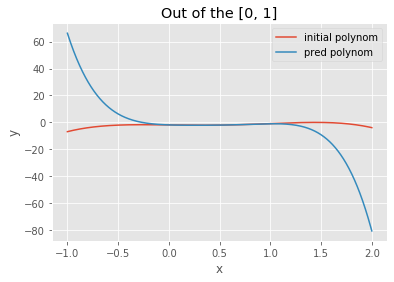

x = 1.2 prediction: -1.672233204252944
x = 1.5 prediction: -9.297398153818282
x = 2 prediction: -80.88082911652671


a0_est = -2.0113078486179106
ai_est = [-1.21615304e-01 -2.22506683e+01  1.52330810e+02 -4.34767901e+02
  6.30801664e+02 -4.50667731e+02  1.25593356e+02]
R^2: 0.9339531115159051
MSE: 0.008327212982432853


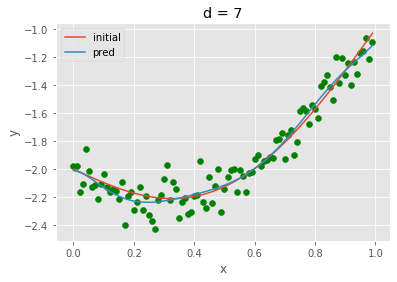

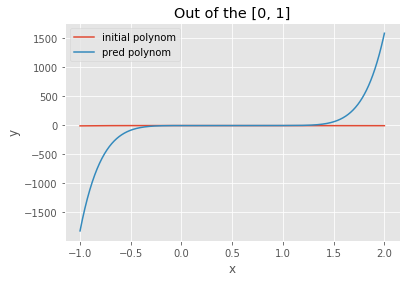

x = 1.2 prediction: 1.468176395809543
x = 1.5 prediction: 63.489495110874465
x = 2 prediction: 1589.9708838063975




In [6]:
for d in {k, k+1, k+3}:
    fig, ax = plt.subplots()
    lnr = LinearRegression()
    
    X_train = np.array([X]).T
    
    for deg in range(2, d+1):
        t = np.power(X, deg)
        t = np.array([t]).T
        X_train = np.concatenate((X_train, t), axis=1)
    
    lnr.fit(X_train, y_train)
    
    y_pred = lnr.predict(X_train)
    
    print('a0_est =', lnr.intercept_)
    print('ai_est =', lnr.coef_) 
    print('R^2:', lnr.score(X_train, y_train))
    print('MSE:', MSE(y_train, y_pred))
        
    ax.scatter(X, y_train, c='g')
    ax.plot(X, f(X), label='initial')
    ax.plot(X, y_pred, label='pred')
    
    ax.legend()
    ax.set_title('d = ' + str(d))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    
    #за пределами отрезка [0, 1]
    fig, ax = plt.subplots()
    
    def g(x, a0, a):
        P = a0
        for i in range(0, len(a)):
            P += a[i]*x**(i+1)
        return P
    
    ax.plot(domain, f(domain), label='initial polynom')
    ax.plot(domain, g(domain, lnr.intercept_, lnr.coef_), label='pred polynom')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Out of the [0, 1]')
    plt.show()
    
    X1 = np.array([[1.2**k for k in range(1, d+1)]])
    y1 = lnr.predict(X1)
    print('x = 1.2 prediction:', *y1)
    
    X1 = np.array([[1.5**k for k in range(1, d+1)]])
    y1 = lnr.predict(X1)
    print('x = 1.5 prediction:', *y1)
    
    X1 = np.array([[2**k for k in range(1, d+1)]])
    y1 = lnr.predict(X1)
    print('x = 2 prediction:', *y1)
    
    print('\n')